## *Train and Classify with pyAudioAnalysis*

In [1]:
import os
import shutil
import random
import numpy as np
import timeit
import random
import numpy as np
import librosa
from pyAudioAnalysis import audioTrainTest as aT
from pyAudioAnalysis import audioSegmentation as aS
from IPython.display import display, Audio
%matplotlib inline

os.chdir('/home/sharedfolder/')

## Uncomment these lines the first time you run this notebook to download the training data.
#!wget http://www.stephenmclaughlin.net/HILT/DDay_noisy_correspondent_train.zip
#!unzip DDay_noisy_correspondent_train.zip

os.chdir('/home/sharedfolder/DDay_noisy_correspondent_train')

The following command will train an SVM classifier using the Python package **`pyAudioAnalysis`**, which it will store in the directory **`models`**.

The list argument **`['not_noisy','noisy']`** in the command below points to the directories **`noisy`** and **`not_noisy`**. Because of the order we've chosen, the model will output 0 (zero) for "not_noisy" and 1 for "noisy."

You can find more details on the [pyAudioAnalysis Wiki](https://github.com/tyiannak/pyAudioAnalysis/wiki/4.-Classification-and-Regression) and in this [article in PLOS one](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0144610) by  Theodoros Giannakopoulos, the package's creator.

You can find the source code for the aT.audioTrainTest module [here](https://github.com/tyiannak/pyAudioAnalysis/blob/master/audioTrainTest.py).

By the way, the default values **`aT.shortTermWindow`** and **`aT.shortTermStep`** are both 0.050 seconds.

In [ ]:
start = timeit.default_timer()

aT.featureAndTrain(['not_noisy','noisy'], 1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, \
                   "svm", "models/svm_NBC_noise", False) 


In [ ]:
print(timeit.default_timer() - start)     ## Measuring how long it takes to train our model

#### **`pyAudioAnalysis`** supports 4 classification algorithms using the package **`scikit-learn`**, and it provides its own version of k-nearest neighbors. You can swap in the terms below in place of "svm" above to compare performance and training time.

    svm
    randomforest
    knn
    gradientboosting
    extratrees

Here's a [helpful article](http://scikit-learn.org/stable/modules/svm.html) on SVMs in general and scikit-learn's implementation of the algorithm.

## *Classifying unseen audio*

In [2]:
## Uncomment this line to download a set of clips from audio files that were not used in the training set (1.68GB)

#!wget http://www.stephenmclaughlin.net/HILT/DDay_noisy_correspondent_unseen.zip -O ../DDay_noisy_correspondent_unseen.zip
#!unzip ../DDay_noisy_correspondent_unseen.zip -d ../

In [3]:
model_path = 'models/svm_NBC_noise'
dir_path = '../DDay_noisy_correspondent_unseen/'
wav_filename = random.choice(os.listdir(dir_path))
wav_path = os.path.join(dir_path,wav_filename)

classifier_output, classes, acc, CM = aS.mtFileClassification(wav_path, model_path, "svm")

print(wav_filename)
display(Audio(wav_path))
print("0: " + classes[0])
print("1: " + classes[1])
print('')
print(classifier_output)
print('')
print("Mean classification: " + str(np.mean(classifier_output)))
print('-'*75)

CBD-440606_NBC1215-NewsBehindTheNews.mp3.0007.wav


0: not_noisy
1: noisy

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

Mean classification: 0.0
---------------------------------------------------------------------------


## *Adding a music/speech classifier*

In [ ]:
## Uncomment and run the following lines to download a trained specch/music SVM model from pyAudioAnalysis.

#!wget -P /home/sharedfolder/DDay_noisy_correspondent_train/models/ https://raw.githubusercontent.com/tyiannak/pyAudioAnalysis/master/data/svmSM
#!wget -P /home/sharedfolder/DDay_noisy_correspondent_train/models/ https://raw.githubusercontent.com/tyiannak/pyAudioAnalysis/master/data/svmSM.arff
#!wget -P /home/sharedfolder/DDay_noisy_correspondent_train/models/ https://raw.githubusercontent.com/tyiannak/pyAudioAnalysis/master/data/svmSMMEANS

# And browse more trained models here:
# https://github.com/tyiannak/pyAudioAnalysis/tree/master/data


In [ ]:
## Comparing music and noisy scores

dir_path = '../DDay_noisy_correspondent_unseen/'
wav_filename = random.choice(os.listdir(dir_path))
wav_path = os.path.join(dir_path,wav_filename)

noise_output, noise_classes, acc, CM = aS.mtFileClassification(wav_path, 'models/svm_NBC_noise', "svm")
music_output, music_classes, acc, CM = aS.mtFileClassification(wav_path, 'models/svmSM', "svm")

print(wav_filename)
display(Audio(wav_path))
print("0: " + noise_classes[0])
print("1: " + noise_classes[1])
print('')
print(noise_output)
print('')
print("Noise mean: " + str(np.mean(noise_output)))
print('-'*75)
print('')
print("0: " + music_classes[0])
print("1: " + music_classes[1])
print('')
print(music_output)
print('')
print("Music mean: " + str(np.mean(music_output)))
print('-'*75)

## *D-Day Remote Correspondent Classifier*

CBD-440606_NBC1730-NewsandMusic.mp3.0010.wav
Noisy mean: 0.5
Music mean: 0.4


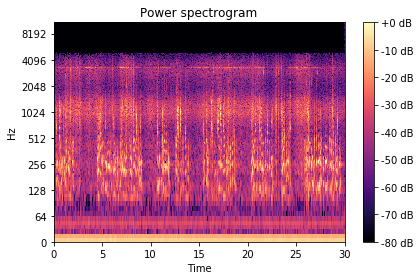

In [27]:
import matplotlib.pyplot as plt
import librosa.display

dir_path = '../DDay_noisy_correspondent_unseen/'
wav_filename = random.choice([item for item in os.listdir(dir_path) if '.wav' in item])
wav_path = os.path.join(dir_path,wav_filename)

noise_output, noise_classes, acc, CM = aS.mtFileClassification(wav_path, 'models/svm_NBC_noise', "svm")
music_output, music_classes, acc, CM = aS.mtFileClassification(wav_path, 'models/svmSM', "svm")

print(wav_filename)

print("Noisy mean: " + str(np.mean(noise_output)))
print("Music mean: " + str(np.mean(music_output)))

sample_array, sample_rate = librosa.load(wav_path)
D = librosa.stft(sample_array)
librosa.display.specshow(librosa.amplitude_to_db(D,ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

display(Audio(wav_path))

## *Searching for noisy, non-music audio*

In [14]:
import matplotlib.pyplot as plt
import librosa.display

dir_path = '../DDay_noisy_correspondent_unseen/'
wav_filename = random.choice([item for item in os.listdir(dir_path) if '.wav' in item])
wav_path = os.path.join(dir_path,wav_filename)

counter=0

while True:
    noise_output, noise_classes, acc, CM = aS.mtFileClassification(wav_path, 'models/svm_NBC_noise', "svm")
    music_output, music_classes, acc, CM = aS.mtFileClassification(wav_path, 'models/svmSM', "svm")
    
    if (np.mean(noise_output) > 0.4):
        if (np.mean(music_output < 0.5)):
            print(wav_filename)
            print("Noisy: " + str(np.mean(noise_output)))
            print("Music: " + str(np.mean(music_output)))
            sample_array, sample_rate = librosa.load(wav_path)
            D = librosa.stft(sample_array)
            librosa.display.specshow(librosa.amplitude_to_db(D,ref=np.max), y_axis='log', x_axis='time')
            plt.title('Power spectrogram')
            plt.colorbar(format='%+2.0f dB')
            plt.tight_layout()
            display(Audio(wav_path))  
    counter+=1
    if counter > 12:
        print("No examples found; there might be a problem.")
        break



No examples found; there might be a problem.
